# Anomaly Detection
## Alvaro Andres Esquivel Gomez 11002822

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
%matplotlib inline
from sklearn.metrics import f1_score

In [2]:
#Datos entrenamiento
train = pd.read_csv('estaturas.csv', sep=';')
train.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


In [3]:
#Datos de validacion
val = pd.read_csv('valtest.csv', sep=';')
val.head()

,Estatura,Edad
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30


In [4]:
#Datos de pruebas
test = pd.read_csv('estaturas_anomalias.csv', sep=';')
test.head()

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [5]:
#Calcula vector de medias y de covarianza
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

#Calcula la pdf
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

#Selecciona el umbral utilizando set validacion

def selectThresholdByCV(probs, gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):

        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon

In [6]:
mu, sigma = estimateGaussian(train)
p = multivariateGaussian(train, mu, sigma)
print("mu:", mu, "\nsigma:", sigma, "\np:", p)

mu: Estatura     1.737647
Edad        28.470588
dtype: float64 
sigma: [[6.10944742e-03 9.32263815e-03]
 [9.32263815e-03 1.98324421e+01]] 
p: [0.35768858 0.38921291 0.27093241 0.18591491 0.17386742 0.27631041
 0.20056275 0.0788992  0.1365022  0.10971585 0.2146315  0.26591813
 0.15408606 0.18418144 0.26591813 0.20461861 0.35164697 0.03532632
 0.24287258 0.42712602 0.30930529 0.01229028 0.11648915 0.15408606
 0.04611034 0.20979292 0.02520467 0.43635478 0.33206694 0.32260058
 0.31414225 0.09996445 0.18946467 0.31277996]


In [9]:
#Agrega valores de y
#print(val.shape[0])
y_1 = np.zeros((val.shape[0],1))
y_2 = np.ones((test.shape[0],1))
y_gt = np.concatenate((y_1, y_2), axis=0)
prueba = np.concatenate((val, test), axis=0)

In [15]:
#Visualizando el mejor fscore y epsilon
p_cv = multivariateGaussian(prueba, mu, sigma)
fscore, ep = selectThresholdByCV(p_cv, y_gt)
print("fscore:", fscore, "ep:", ep, "\np_cv:", p_cv)

fscore: 1.0 ep: 0.00032260057552227424 
p_cv: [1.89464675e-01 3.12779963e-01 8.02858395e-02 3.08460330e-02
 2.49829800e-01 3.22600576e-01 3.14142254e-01 9.99644485e-02
 6.22113456e-86 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [20]:
#Seleccion de anomalias

anomalias = np.asarray(np.where(p_cv < ep))
print(anomalias)

train = train.to_numpy()

[[ 8  9 10 11]]


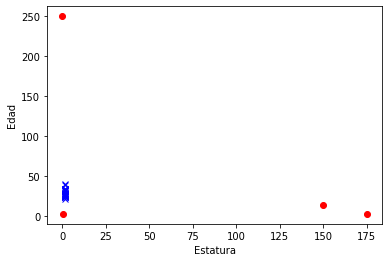

In [21]:
#Representacion grafica a anomalias

plt.figure()
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.plot(train[:,0],train[:,1],'bx')
plt.plot(prueba[anomalias,0],prueba[anomalias,1],'ro')
plt.show()